In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'wine-quality-dataset' dataset.
Path to dataset files: /kaggle/input/wine-quality-dataset


In [ ]:
import pandas as pd
import os

# Get the list of files in the downloaded directory
file_list = os.listdir(path)
print("Files in the dataset directory:", file_list)

# Assuming there is a CSV file in the directory, let's try to load the first one found.
csv_files = [f for f in file_list if f.endswith('.csv')]

if csv_files:
    # Assuming the first CSV file is the one we want to load
    dataset_file_path = os.path.join(path, csv_files[0])
    print("Loading dataset from:", dataset_file_path)
    wine_df = pd.read_csv(dataset_file_path)
    print("Dataset loaded successfully!")
    display(wine_df.head())
else:
    print("No CSV files found in the dataset directory.")

Files in the dataset directory: ['WineQT.csv']
Loading dataset from: /kaggle/input/wine-quality-dataset/WineQT.csv
Dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine_df.shape

(1143, 13)

In [ ]:
display(wine_df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [ ]:
wine_df.info()
numerical_features = wine_df.select_dtypes(include=['number']).columns.tolist()
# Exclude 'Id' as it's an identifier and not a feature for distribution analysis
if 'Id' in numerical_features:
    numerical_features.remove('Id')

print("Numerical features suitable for distribution analysis:", numerical_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
Numerical features suitable for distribution analysis: ['fixed acidity', 'v

In [ ]:
# Check for duplicate rows
duplicate_rows = wine_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("\nDisplaying the first 5 duplicate rows:")
    # Display the first 5 duplicate rows
    display(wine_df[wine_df.duplicated(keep=False)].head())
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


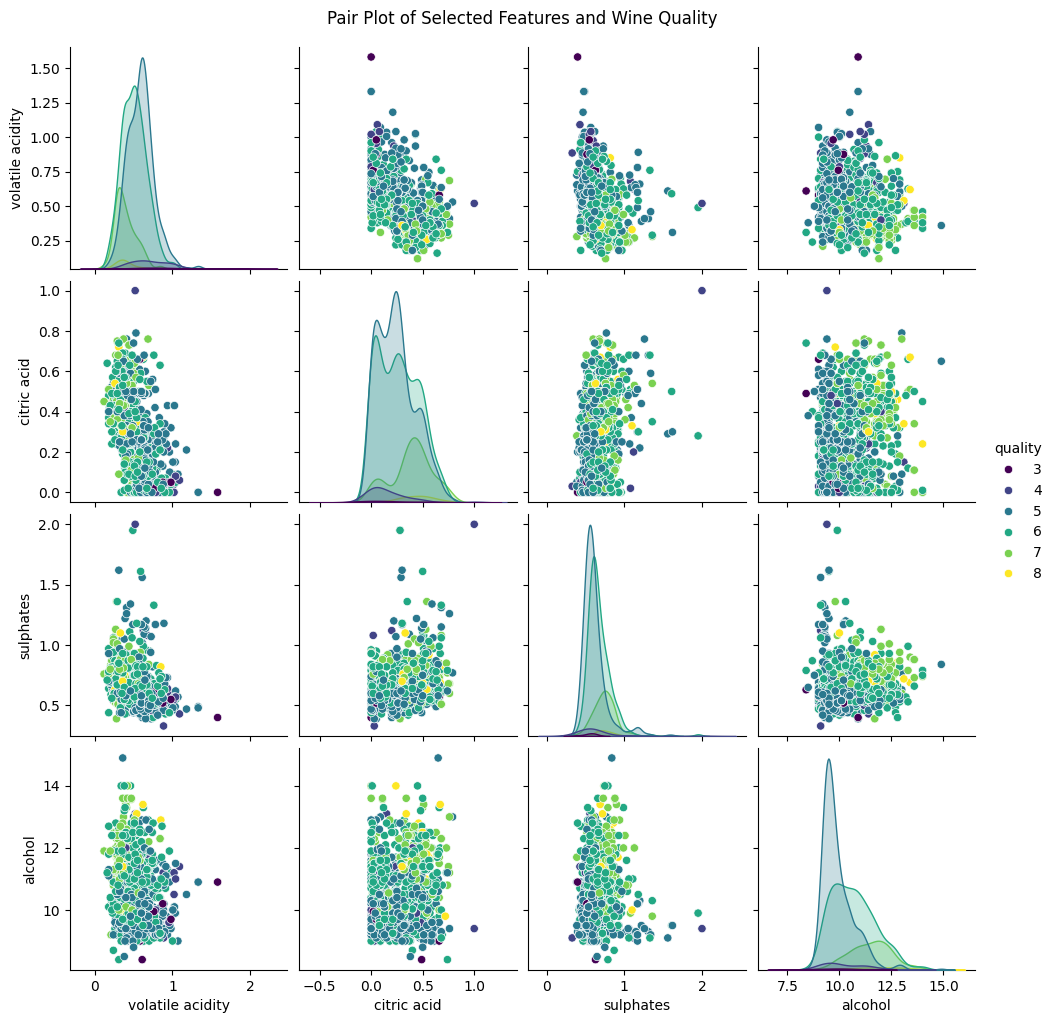

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features for the pair plot, including 'quality'
# Choosing a few features to avoid a very large plot and focus on key relationships
selected_features = ['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality']

# Generate the pair plot
sns.pairplot(wine_df[selected_features], hue='quality', palette='viridis')
plt.suptitle('Pair Plot of Selected Features and Wine Quality', y=1.02) # Add a title
plt.show()

## Interpretation of Pair Plot:

Based on the pair plot visualizing the relationships between 'volatile acidity', 'citric acid', 'sulphates', 'alcohol', and 'quality':

* **Relationships with Quality:** Observe the last row or last column, which shows the relationship of each selected feature with 'quality'. You can see how the distribution of each feature varies across different quality levels. For example, higher alcohol content might be associated with higher quality wines.
* **Relationships between Features:** The scatter plots in the upper and lower triangles of the matrix show the relationships between pairs of features. For instance, you might observe a trend between 'citric acid' and 'volatile acidity'.
* **Distribution of Features:** The histograms on the diagonal show the distribution of each individual feature, separated by quality. This can reveal if certain features have different distributions for different quality levels.

**General Observations:**

* **Alcohol:** There appears to be a positive relationship between alcohol content and wine quality, with higher quality wines generally having higher alcohol levels.
* **Volatile Acidity:** There seems to be a negative relationship between volatile acidity and wine quality, with lower quality wines tending to have higher volatile acidity.
* **Sulphates:** Higher sulphate levels might be associated with higher quality wines, although the relationship might not be as strong as with alcohol.
* **Citric Acid:** There might be a slight positive trend between citric acid and quality, but it's less clear. Also, notice the relationship between citric acid and volatile acidity – as citric acid increases, volatile acidity seems to decrease.

In [14]:
# Calculate the correlation of each feature with the 'quality' variable
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)

# Remove the correlation of 'quality' with itself
quality_correlation = quality_correlation.drop('quality')

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=quality_correlation.values, y=quality_correlation.index, palette='coolwarm')
plt.title('Correlation of Features with Wine Quality')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

NameError: name 'correlation_matrix' is not defined

/tmp/ipython-input-772760939.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_correlation.values, y=quality_correlation.index, palette='coolwarm')


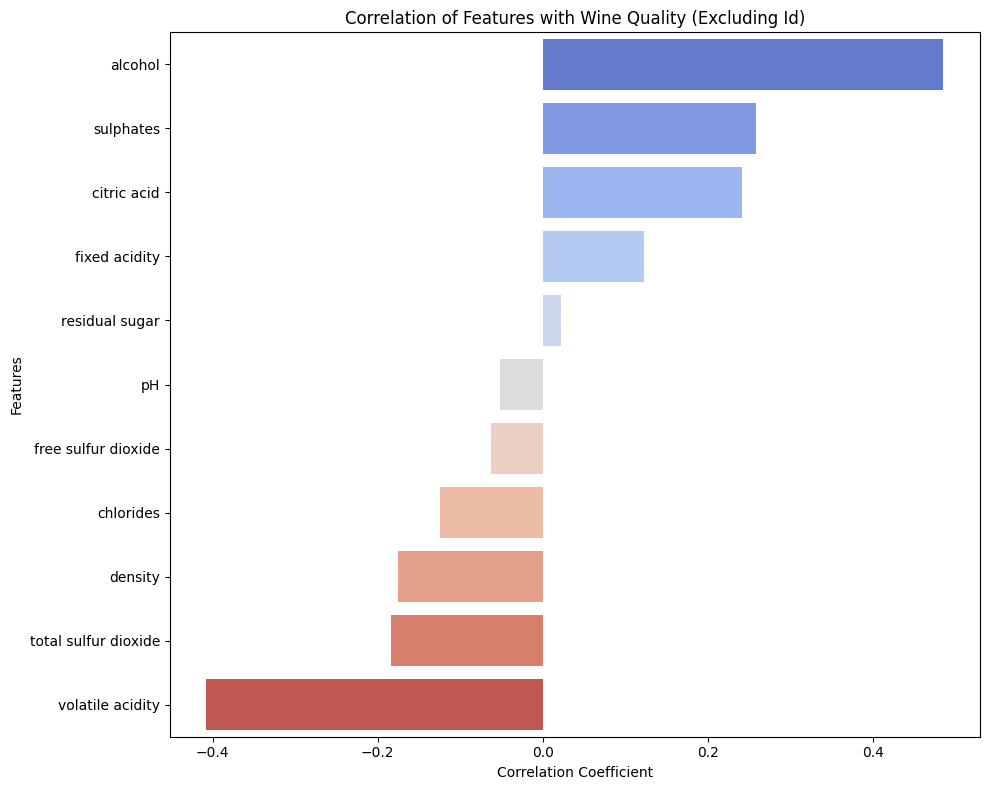

In [16]:
# Calculate the correlation matrix excluding 'Id'
correlation_matrix = wine_df.drop('Id', axis=1).corr(numeric_only=True)

# Calculate the correlation of each feature with the 'quality' variable
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)

# Remove the correlation of 'quality' with itself
quality_correlation = quality_correlation.drop('quality')

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=quality_correlation.values, y=quality_correlation.index, palette='coolwarm')
plt.title('Correlation of Features with Wine Quality (Excluding Id)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

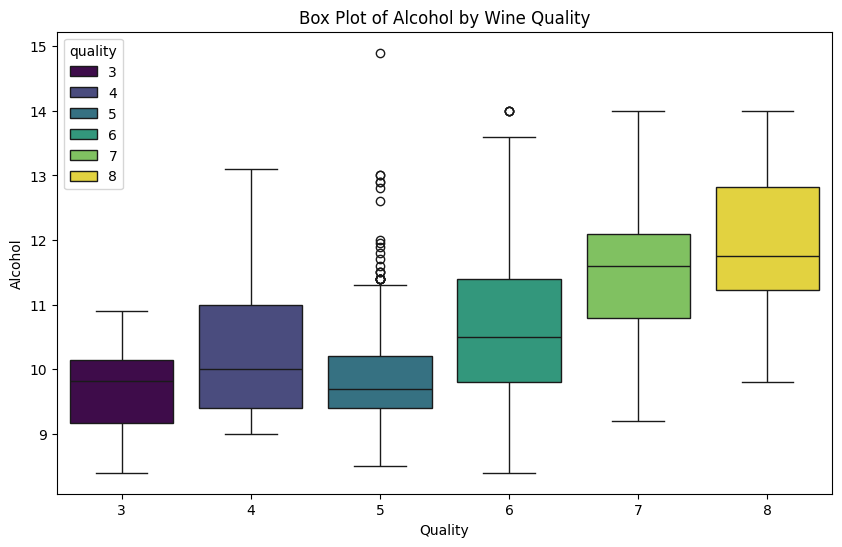

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='quality', data=wine_df, palette='viridis')
plt.title('Box Plot of Alcohol by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

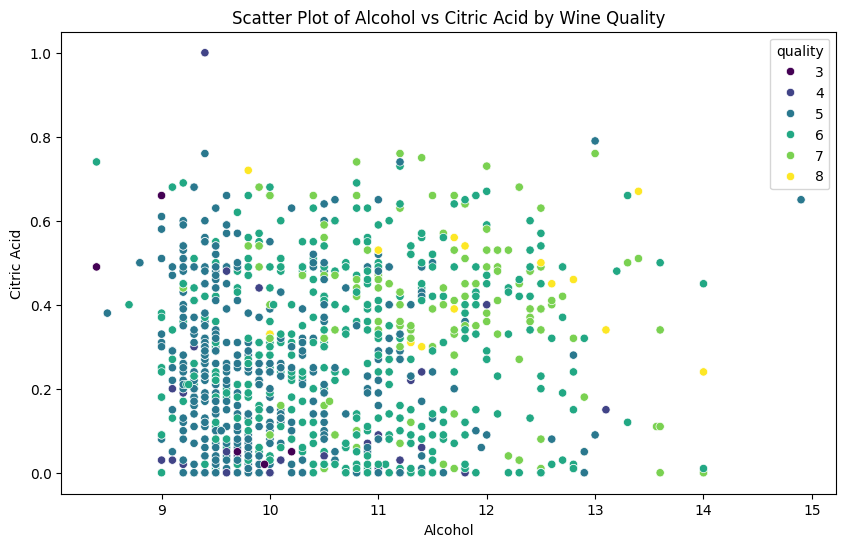

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='citric acid', hue='quality', data=wine_df, palette='viridis')
plt.title('Scatter Plot of Alcohol vs Citric Acid by Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Citric Acid')
plt.show()

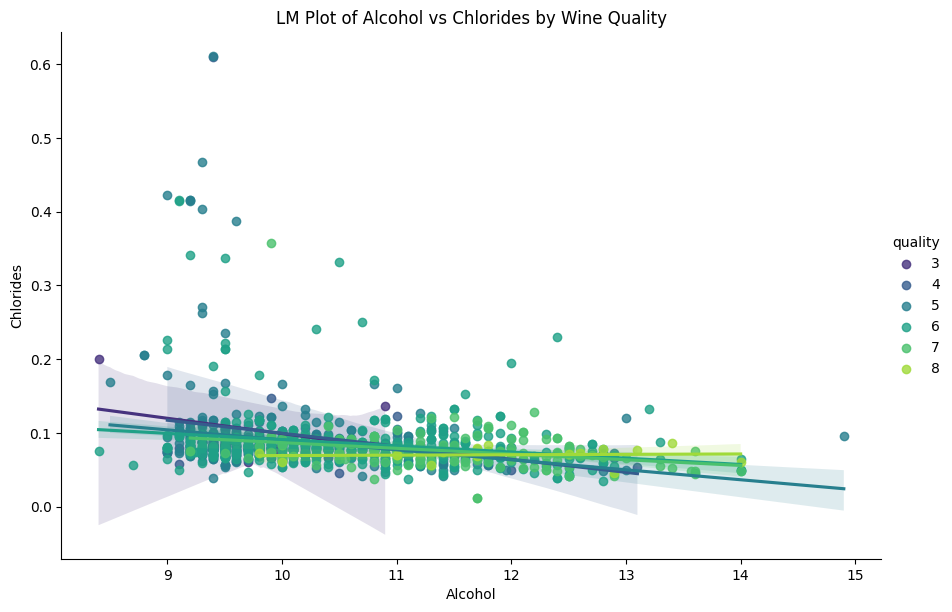

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='alcohol', y='chlorides', hue='quality', data=wine_df, palette='viridis', height=6, aspect=1.5)
plt.title('LM Plot of Alcohol vs Chlorides by Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Chlorides')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid

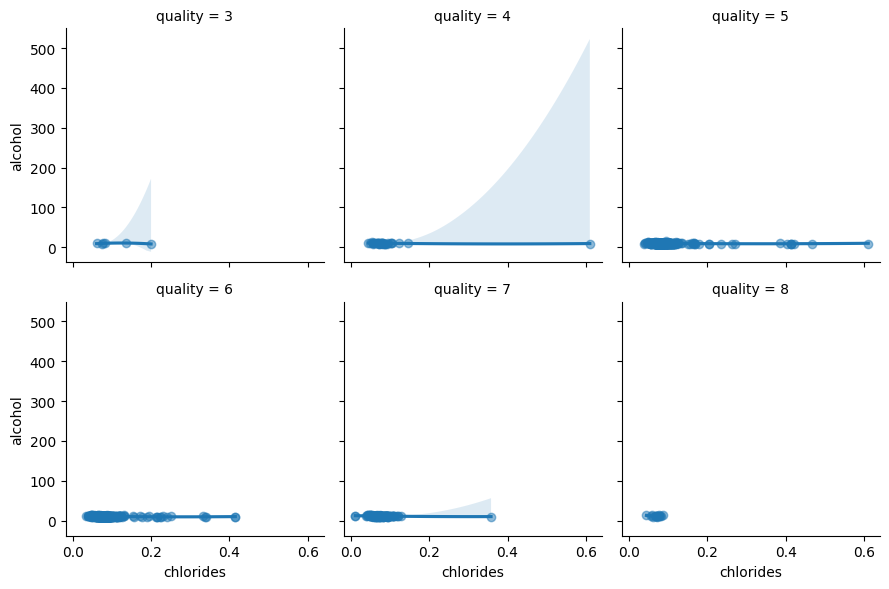

In [21]:
sns.lmplot(
    data=wine_df, x="chlorides", y="alcohol",
    col="quality", col_wrap=3, order=2, height=3, scatter_kws={"alpha":0.5}
)
plt.show()

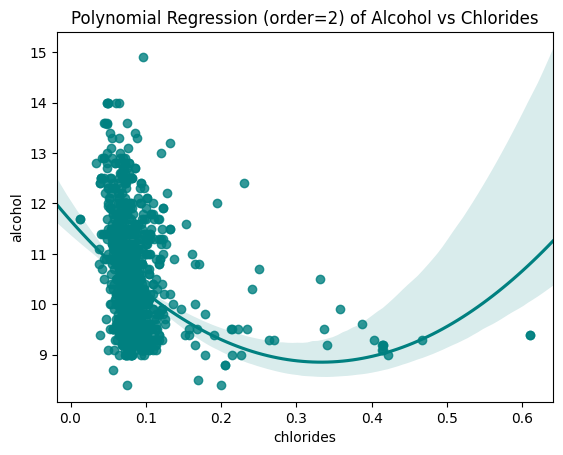

In [22]:
sns.regplot(
    data=wine_df, x="chlorides", y="alcohol",
    scatter=True, truncate=False, order=2, color="teal"
)
plt.title("Polynomial Regression (order=2) of Alcohol vs Chlorides")
plt.show()

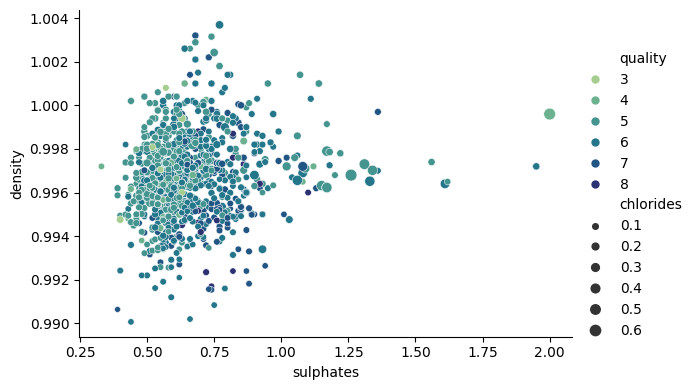

In [23]:
sns.relplot(
    data=wine_df,
    x="sulphates", y="density", hue="quality", size="chlorides",
    kind="scatter", palette="crest", height=4, aspect=1.5
)
plt.show()

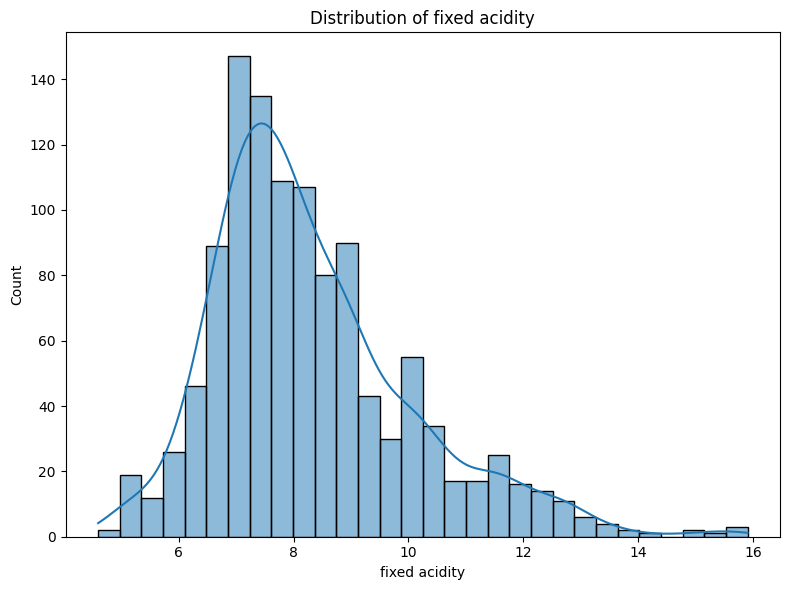

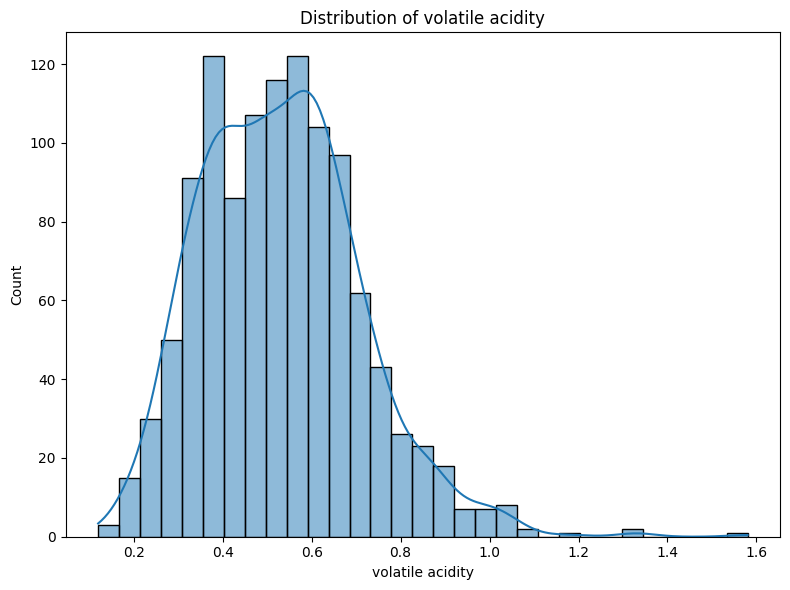

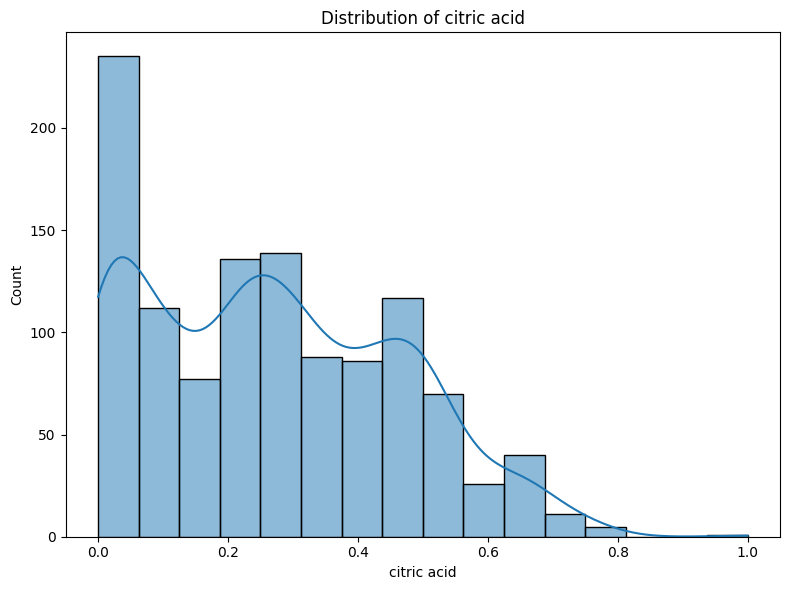

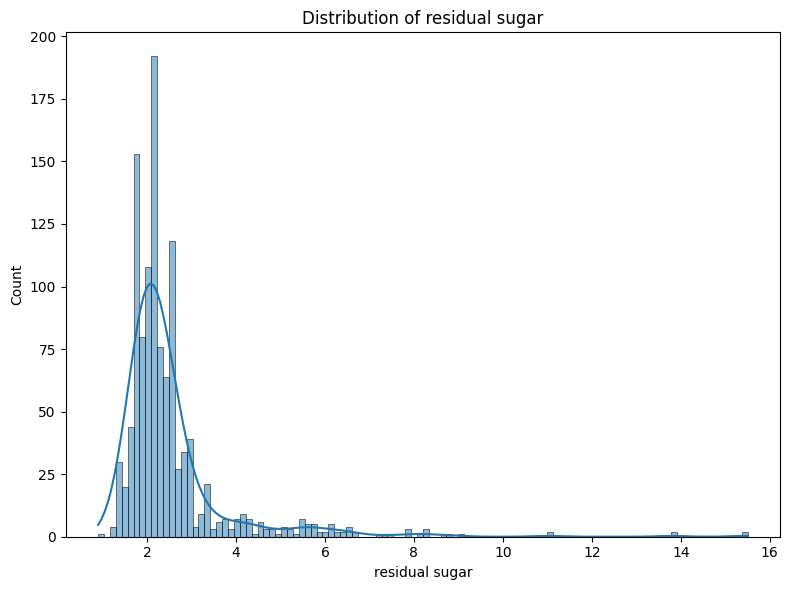

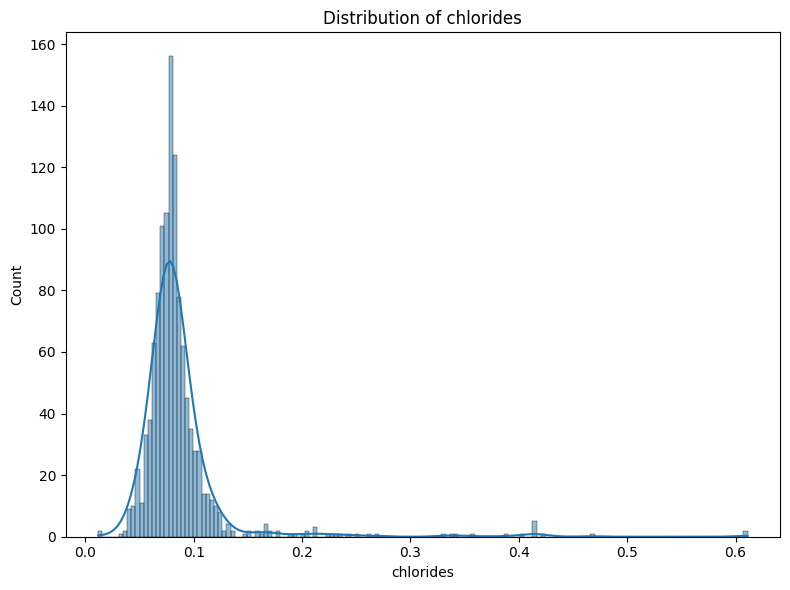

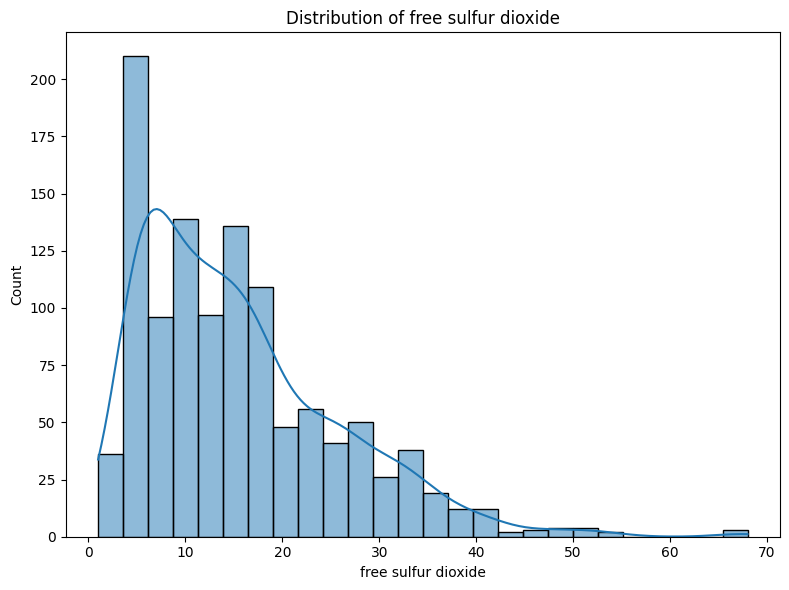

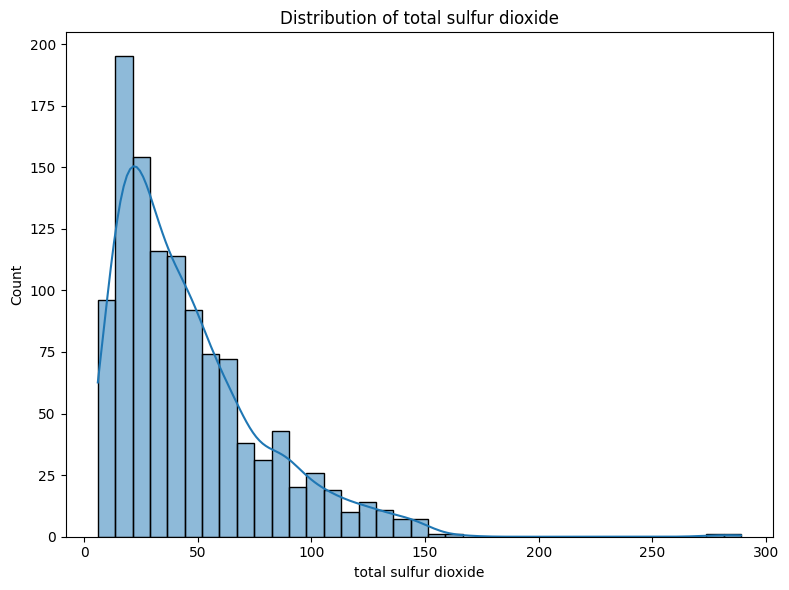

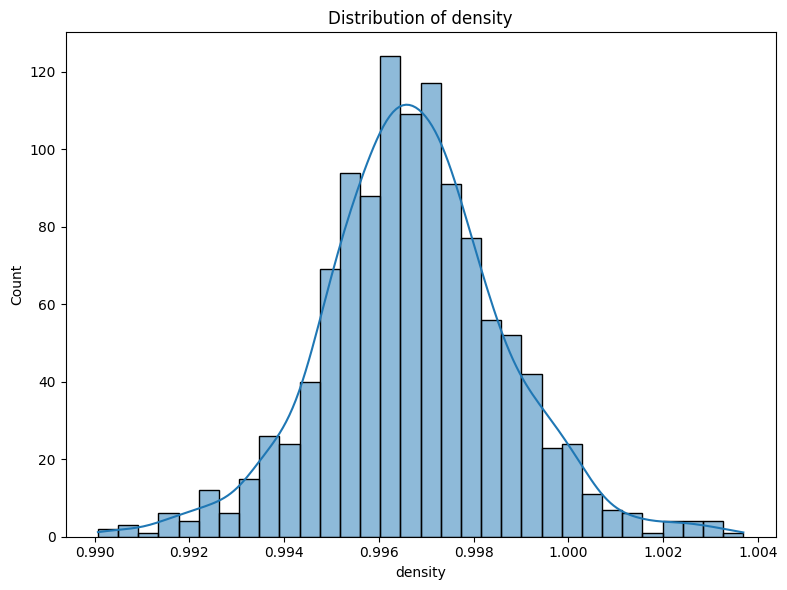

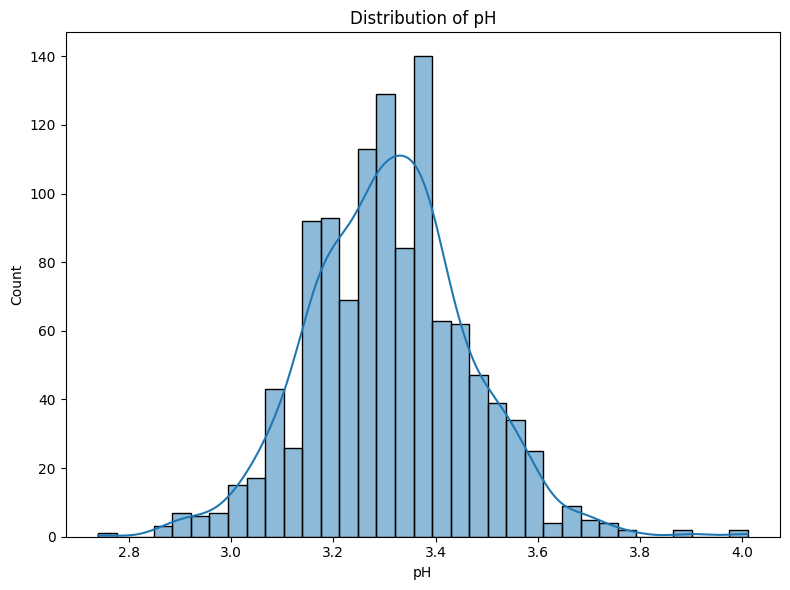

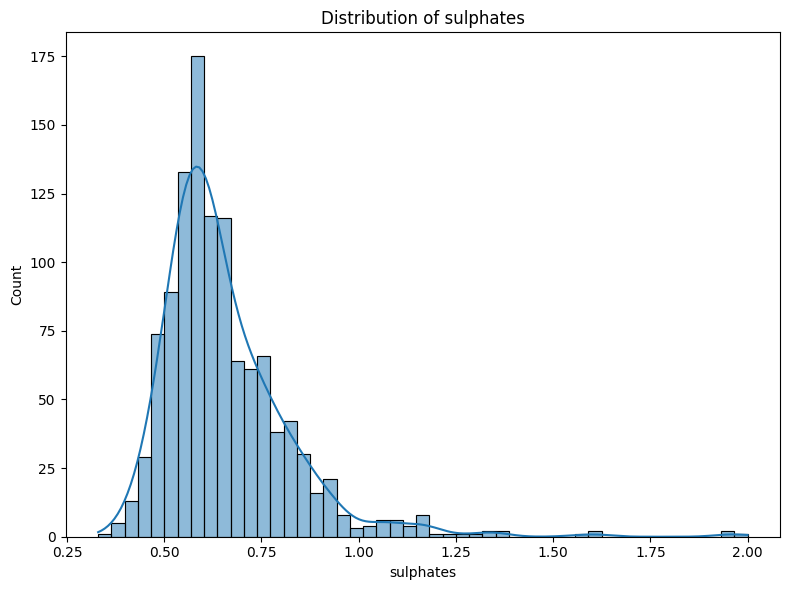

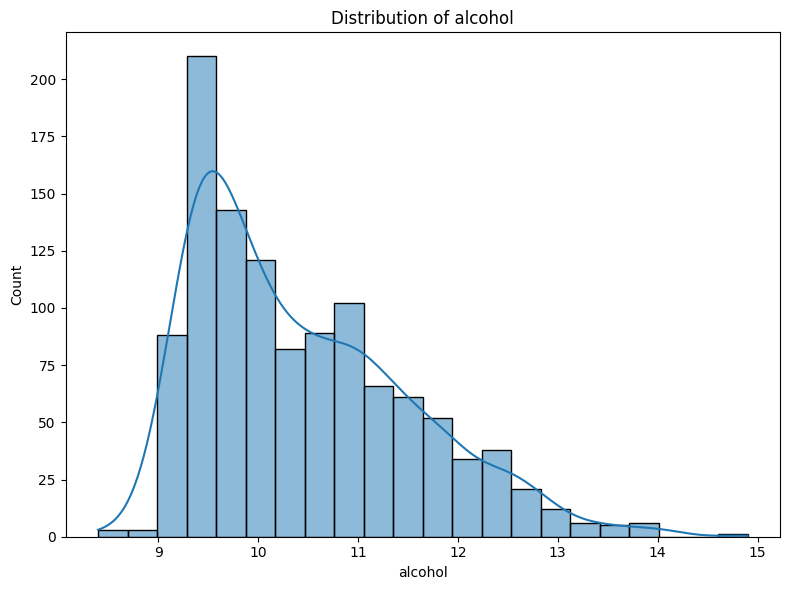

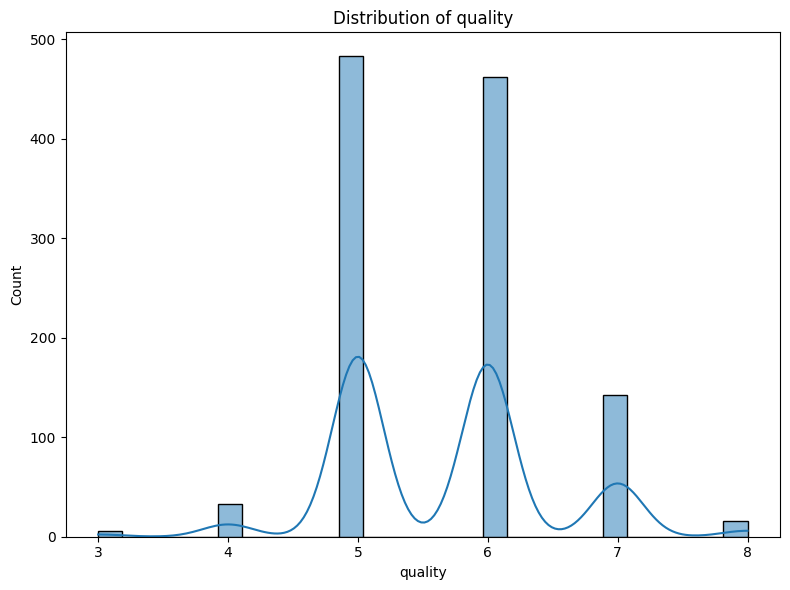

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=wine_df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

## Interpretation of Plots:

Based on the histograms of the feature distributions:

*   **Fixed Acidity:** The distribution appears somewhat skewed to the right, with a peak around 7-8.
*   **Volatile Acidity:** This distribution is also skewed to the right, with a peak around 0.4-0.6.
*   **Citric Acid:** Many wines have zero citric acid, with the distribution skewed to the right for those that do.
*   **Residual Sugar:** This distribution is heavily skewed to the right, with most wines having low residual sugar.
*   **Chlorides:** Similar to residual sugar, the distribution of chlorides is heavily skewed to the right.
*   **Free Sulfur Dioxide:** The distribution is skewed to the right, with a peak around 10-20.
*   **Total Sulfur Dioxide:** This distribution is also skewed to the right, with a peak around 30-60.
*   **Density:** The distribution of density appears to be roughly normal, with a peak around 0.996 - 0.998.
*   **pH:** The pH distribution looks somewhat like a normal distribution, centered around 3.3.
*   **Sulphates:** The distribution of sulphates is skewed to the right, with a peak around 0.6-0.7.
*   **Alcohol:** The alcohol distribution is somewhat spread out, with peaks around 9-10 and 11-12.
*   **Quality:** The distribution of quality is discrete, with most wines rated 5 or 6. This suggests some imbalance in quality ratings.

These interpretations help us understand the characteristics of the wine data.

In [25]:
correlation_matrix = wine_df[numerical_features].corr()
display(correlation_matrix)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


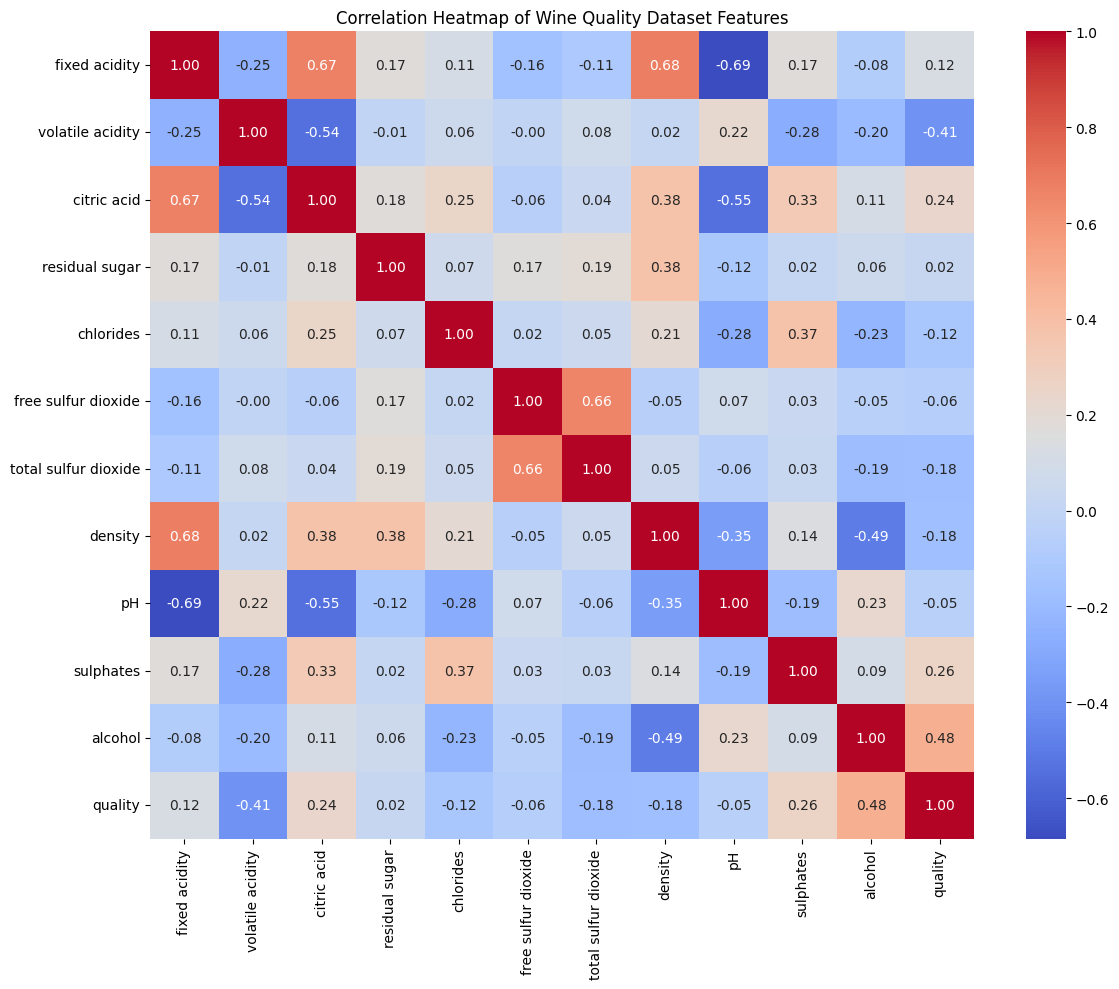

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Quality Dataset Features')
plt.tight_layout()
plt.show()

### Data Analysis Key Findings

*   The correlation matrix was successfully calculated and visualized using a heatmap.
*   Key positive correlations with 'quality' were observed for 'alcohol' and 'sulphates'.
*   A negative correlation was found between 'quality' and 'volatile acidity'.
*   Other notable correlations included a positive relationship between 'citric acid' and 'fixed acidity', and a negative relationship between 'citric acid' and 'volatile acidity'.
*   'Fixed acidity' also showed a positive correlation with 'density'.


In [ ]:
# Check for missing values
missing_values = wine_df.isnull().sum()
print("Missing values per column:")
display(missing_values)

Missing values per column:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


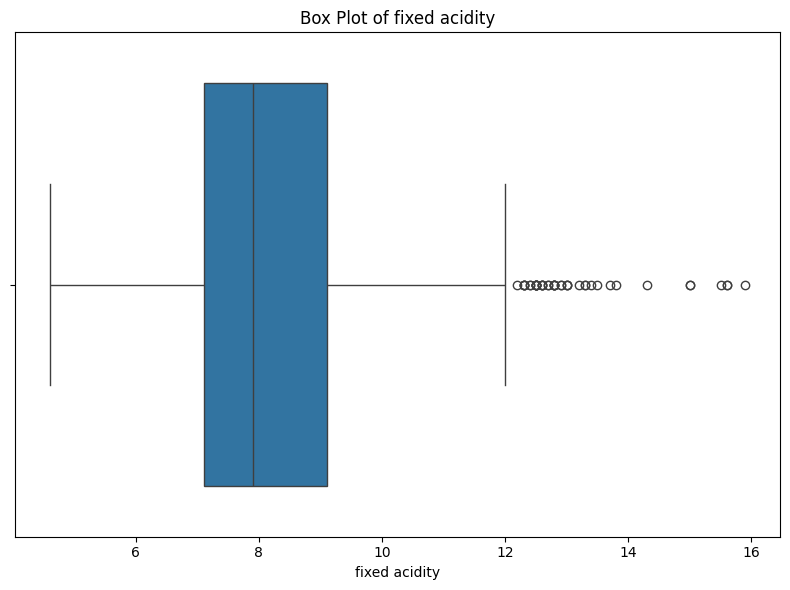

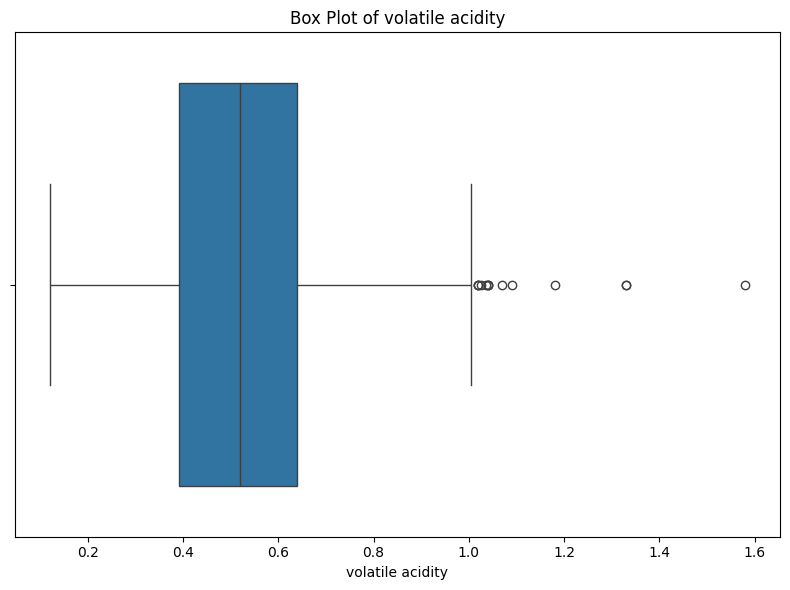

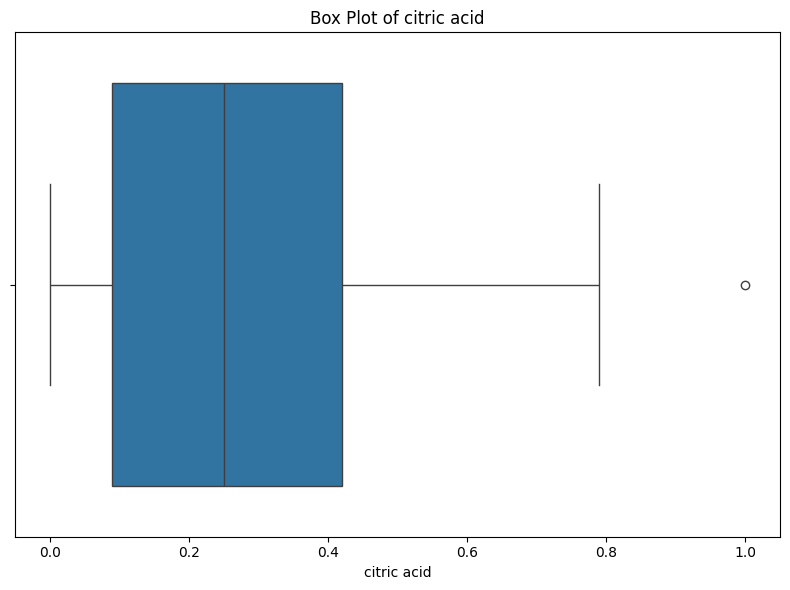

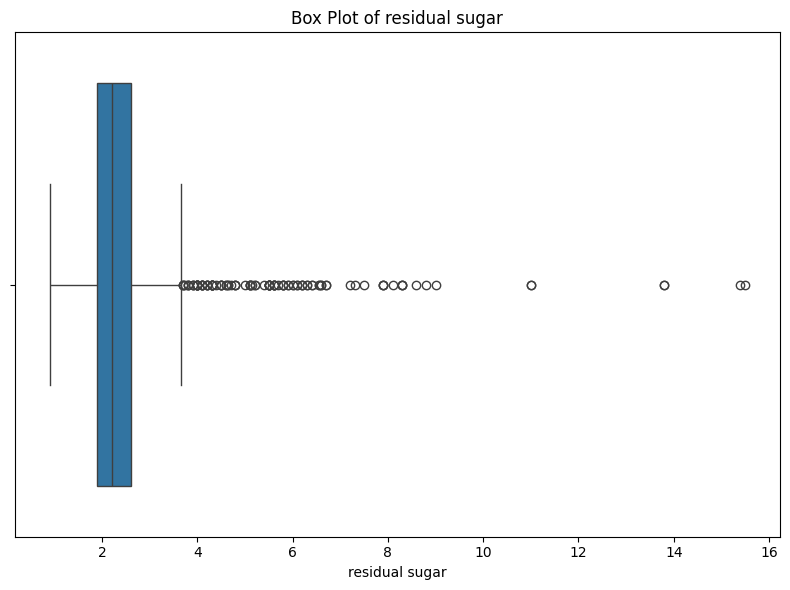

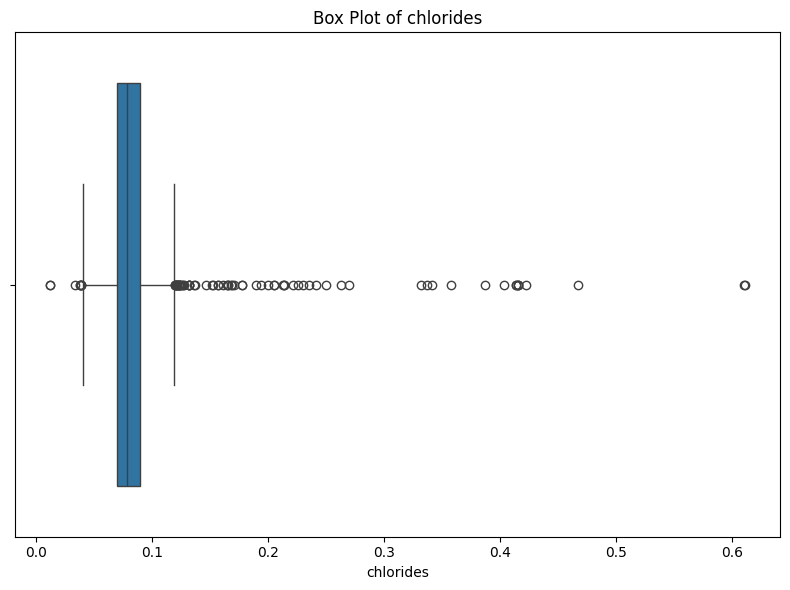

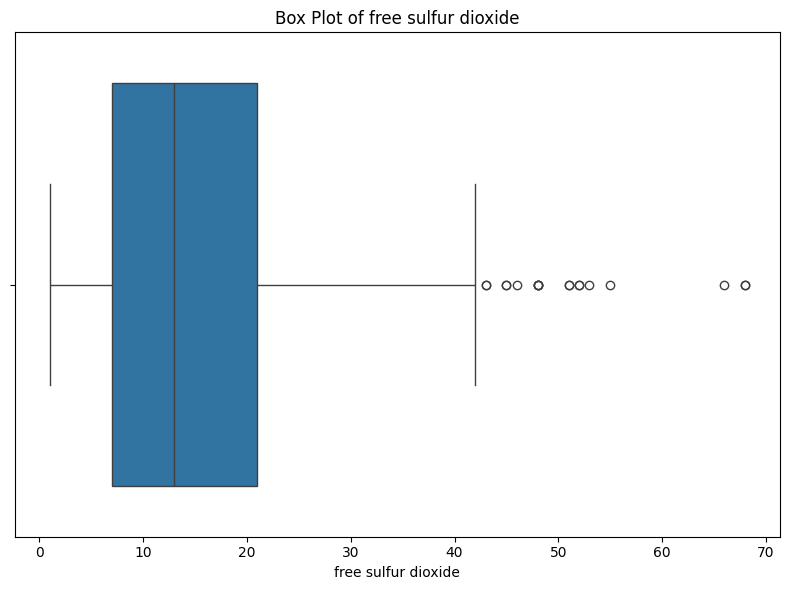

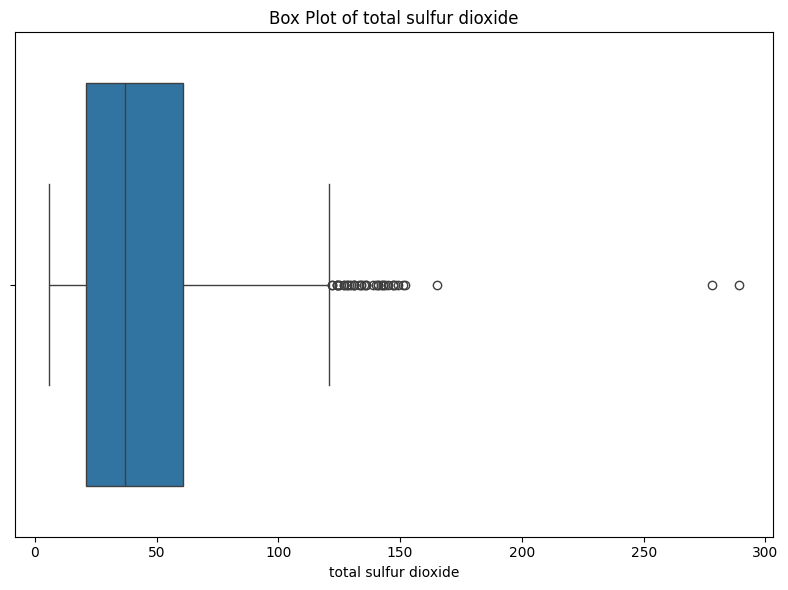

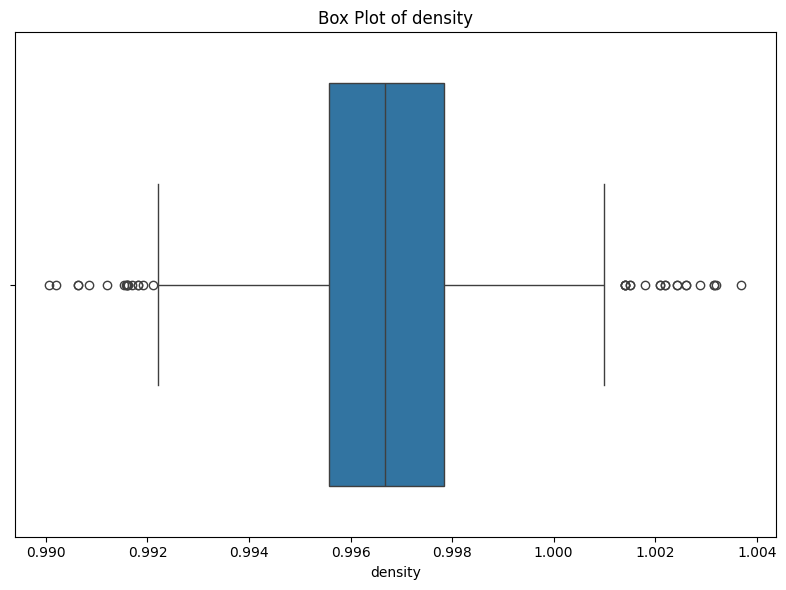

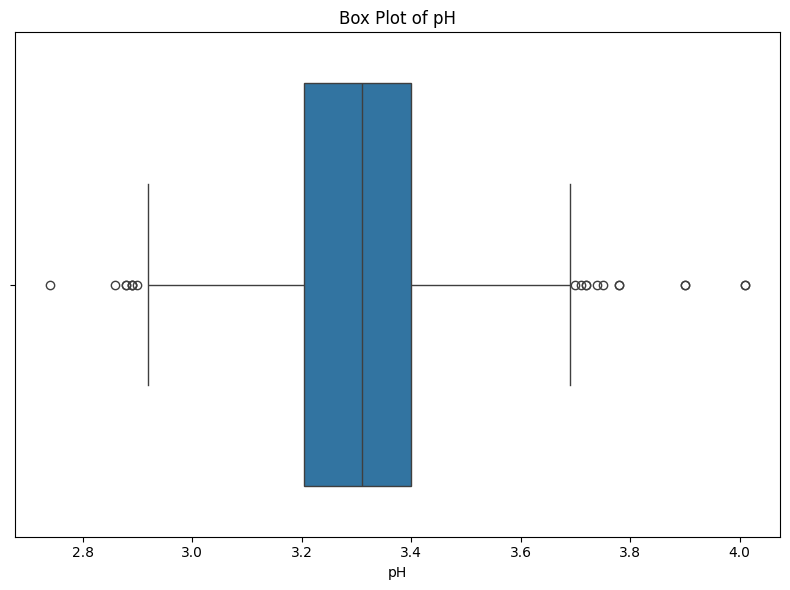

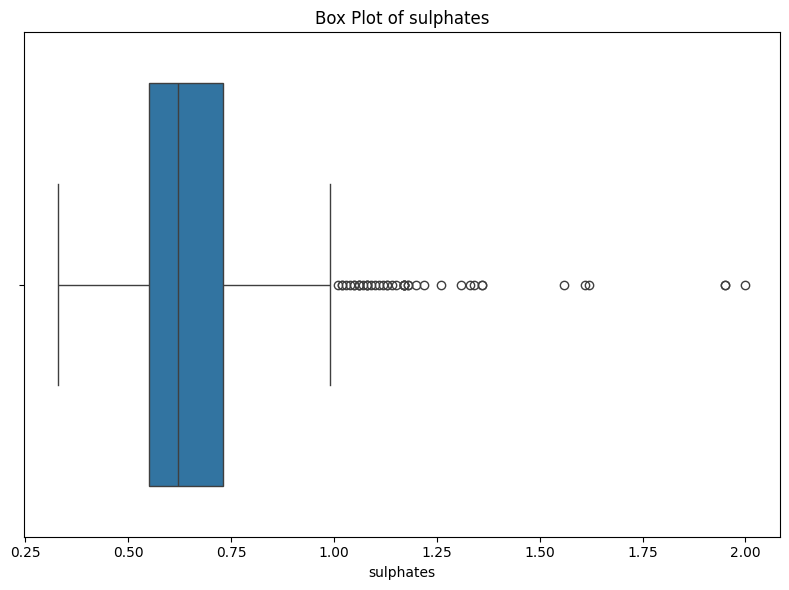

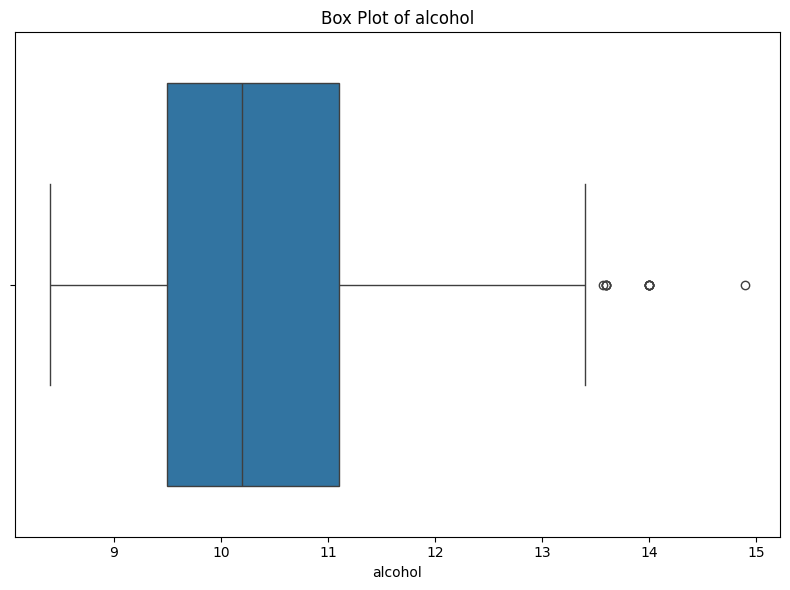

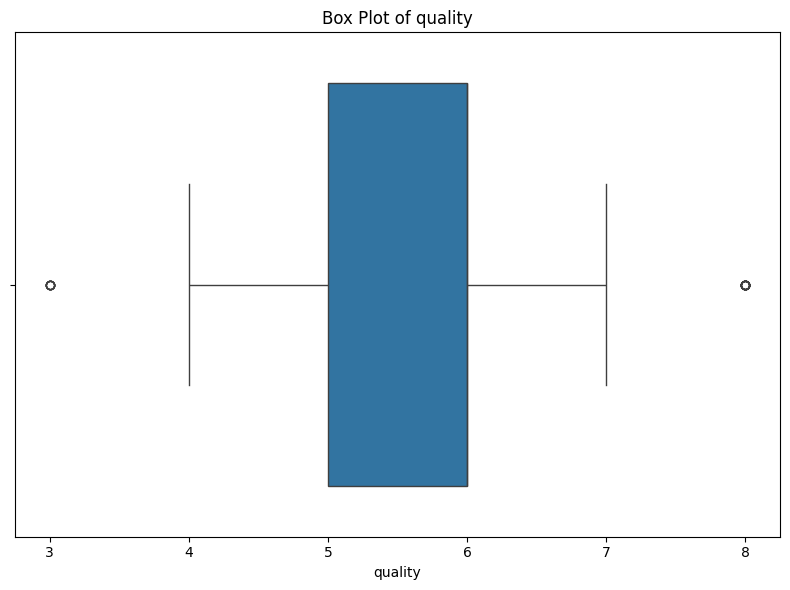

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# We already have the list of numerical features from a previous step
# numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=wine_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

## Interpretation of Box Plots and Outlier Handling:

Based on the box plots generated:

*   Many of the features, such as **residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol**, show a significant number of potential outliers, indicated by the individual points extending far beyond the whiskers of the box plots.
*   Features like **fixed acidity, volatile acidity, citric acid, and density** also show some outliers, but generally fewer compared to the features listed above.
*   **pH** and **quality** appear to have fewer or no extreme outliers, although 'quality' is a discrete variable, so the concept of outliers is slightly different.

**Potential Strategies for Handling Outliers:**

The approach to handling outliers depends on the nature of the data and the goal of your analysis or modeling. Here are a few common strategies:

1.  **Investigation:** Before doing anything, investigate the outliers. Are they data entry errors? Are they valid but extreme observations? Understanding the cause can guide your decision.
2.  **Removal:** If outliers are due to errors or are clearly not representative of the data, you might consider removing them. However, be cautious as removing too much data can lead to loss of information.
3.  **Transformation:** Applying mathematical transformations (e.g., logarithmic, square root) to the skewed features can sometimes reduce the impact of outliers by making the distribution more normal.
4.  **Winsorizing or Trimming:** Winsorizing involves capping extreme values at a certain percentile, while trimming involves removing a certain percentage of the most extreme values from both ends of the distribution.
5.  **Treating them during modeling:** Some models are less sensitive to outliers than others. You might choose a model that can handle outliers effectively.
6.  **Keeping them:** In some cases, outliers represent important information and should not be removed or altered.

The decision of how to handle outliers should be made carefully, considering the potential impact on your analysis and conclusions.

In [27]:
# Drop the 'Id' column as it is not a predictive feature
wine_df = wine_df.drop('Id', axis=1)

print("'Id' column dropped.")
display(wine_df.head())

'Id' column dropped.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping 'quality'
X = wine_df.drop('quality', axis=1)

# Define target variable (y) as the 'quality' column
y = wine_df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data splitting complete.
X_train shape: (914, 11)
X_test shape: (229, 11)
y_train shape: (914,)
y_test shape: (229,)


In [37]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Numerical features scaled successfully.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Numerical features scaled successfully.
X_train_scaled shape: (914, 11)
X_test_scaled shape: (229, 11)


In [35]:
# Define a threshold for binary classification (e.g., quality >= 6 or 7)
# Let's use 6 as the threshold, so quality 6, 7, 8 will be classified as 'good' (1) and 3, 4, 5 as 'not good' (0)
threshold = 6

# Create the binary target variable
y_binary = (y >= threshold).astype(int)

print("Original quality distribution:")
display(y.value_counts().sort_index())

print("\nBinary quality distribution:")
display(y_binary.value_counts())

# Update the y_train and y_test to the new binary target
# Ensure that the split data is also updated with the binary target
X_train_scaled, X_test_scaled, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Display the distribution in the binary training and testing sets
print("\nBinary quality distribution in training set:")
display(y_train_binary.value_counts())

print("\nBinary quality distribution in testing set:")
display(y_test_binary.value_counts())

Original quality distribution:


,count
quality,
3,6
4,33
5,483
6,462
7,143
8,16



Binary quality distribution:


,count
quality,
1,621
0,522



Binary quality distribution in training set:


,count
quality,
1,494
0,420



Binary quality distribution in testing set:


,count
quality,
1,127
0,102


In [44]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
logistic_regression_model_binary = LogisticRegression(class_weight='balanced', max_iter=1000) # Increased max_iter for convergence

# Train the Logistic Regression model on the scaled training data with the binary target
logistic_regression_model_binary.fit(X_train_scaled, y_train_binary)

print("Logistic Regression model (with binary target and scaled data) trained successfully.")

Logistic Regression model (with binary target and scaled data) trained successfully.


In [46]:
y_pred = logistic_regression_model_binary.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score

# Predict on the training data
y_train_pred = logistic_regression_model_binary.predict(X_train_scaled)

# Calculate accuracy on the training data
train_accuracy = accuracy_score(y_train_binary, y_train_pred)

# Predict on the testing data
y_test_pred = logistic_regression_model_binary.predict(X_test_scaled)

# Calculate accuracy on the testing data
test_accuracy = accuracy_score(y_test_binary, y_test_pred)

print(f"Logistic Regression Model Accuracy on Training Set: {train_accuracy:.4f}")
print(f"Logistic Regression Model Accuracy on Testing Set: {test_accuracy:.4f}")

# You can compare these accuracies to check for overfitting.
# If training accuracy is significantly higher than testing accuracy, the model might be overfitting.

Logistic Regression Model Accuracy on Training Set: 0.7681
Logistic Regression Model Accuracy on Testing Set: 0.7424


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object (using the same parameters as the trained model)
# Using class_weight='balanced' for potentially better handling of class imbalance
model_for_cv = LogisticRegression(class_weight='balanced', max_iter=1000)

# Perform 5-fold cross-validation using the scaled training data and binary training target
# We use the training data here to get a sense of the model's performance across different folds
cv_scores = cross_val_score(model_for_cv, X_train_scaled, y_train_binary, cv=5, scoring='accuracy')

print("Cross-validation accuracies (5-fold):")
print(cv_scores)
print(f"\nMean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation accuracies: {cv_scores.std():.4f}")

Cross-validation accuracies (5-fold):
[0.72131148 0.74863388 0.7431694  0.7704918  0.78021978]

Mean cross-validation accuracy: 0.7528
Standard deviation of cross-validation accuracies: 0.0208


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
random_forest_model_binary = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the scaled training data with the binary target
random_forest_model_binary.fit(X_train_scaled, y_train_binary)

print("Random Forest model (with binary target and scaled data) trained successfully.")

Random Forest model (with binary target and scaled data) trained successfully.


In [53]:
from sklearn.metrics import accuracy_score

# Predict on the testing data using the Random Forest model
y_pred_rf = random_forest_model_binary.predict(X_test_scaled)

# Calculate accuracy on the testing data
test_accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)

print(f"Random Forest Model Accuracy on Testing Set: {test_accuracy_rf:.4f}")

Random Forest Model Accuracy on Testing Set: 0.7729


In [54]:
from sklearn.metrics import accuracy_score

# Predict on the training data using the Random Forest model
y_train_pred_rf = random_forest_model_binary.predict(X_train_scaled)

# Calculate accuracy on the training data
train_accuracy_rf = accuracy_score(y_train_binary, y_train_pred_rf)

# We already calculated the testing accuracy in the previous cell (NjXiNoCKLDnX)
# y_pred_rf = random_forest_model_binary.predict(X_test_scaled)
# test_accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)

print(f"Random Forest Model Accuracy on Training Set: {train_accuracy_rf:.4f}")
print(f"Random Forest Model Accuracy on Testing Set: {test_accuracy_rf:.4f}")

# You can compare these accuracies to check for overfitting.
# If training accuracy is significantly higher than testing accuracy, the model might be overfitting.

Random Forest Model Accuracy on Training Set: 1.0000
Random Forest Model Accuracy on Testing Set: 0.7729


In [55]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid for Random Forest defined:")
print(param_grid_rf)

Hyperparameter grid for Random Forest defined:
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
# Using f1_weighted as the scoring metric to account for potential class imbalance
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV to the scaled training data and binary training target
grid_search_rf.fit(X_train_scaled, y_train_binary)

# Print the best parameters found
print("Best hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Store the best estimator
best_rf_model = grid_search_rf.best_estimator_

print("\nBest Random Forest model stored.")

Best hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest model stored.


In [59]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using the best Random Forest model
# We use the scaled training data and binary training target for cross-validation
cv_scores_best_rf = cross_val_score(best_rf_model, X_train_scaled, y_train_binary, cv=5, scoring='accuracy')

print("Cross-validation accuracies (5-fold) for Best Random Forest Model:")
print(cv_scores_best_rf)
print(f"\nMean cross-validation accuracy: {cv_scores_best_rf.mean():.4f}")
print(f"Standard deviation of cross-validation accuracies: {cv_scores_best_rf.std():.4f}")

Cross-validation accuracies (5-fold) for Best Random Forest Model:
[0.79781421 0.80327869 0.78688525 0.80874317 0.74725275]

Mean cross-validation accuracy: 0.7888
Standard deviation of cross-validation accuracies: 0.0220


In [58]:
from sklearn.metrics import accuracy_score

# Predict on the training data using the best Random Forest model
y_train_pred_best_rf = best_rf_model.predict(X_train_scaled)

# Calculate accuracy on the training data
train_accuracy_best_rf = accuracy_score(y_train_binary, y_train_pred_best_rf)

# We already calculated the testing accuracy in the previous cell (e79053dd)
# y_pred_best_rf = best_rf_model.predict(X_test_scaled)
# test_accuracy_best_rf = accuracy_score(y_test_binary, y_pred_best_rf)

print(f"Best Random Forest Model Accuracy on Training Set: {train_accuracy_best_rf:.4f}")
print(f"Best Random Forest Model Accuracy on Testing Set: {accuracy_best_rf:.4f}")

# You can compare these accuracies to check for overfitting.
# If training accuracy is significantly higher than testing accuracy, the model might be overfitting.

Best Random Forest Model Accuracy on Training Set: 0.9716
Best Random Forest Model Accuracy on Testing Set: 0.7948


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the scaled testing data using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_best_rf = accuracy_score(y_test_binary, y_pred_best_rf)
precision_best_rf = precision_score(y_test_binary, y_pred_best_rf, average='weighted', zero_division=0)
recall_best_rf = recall_score(y_test_binary, y_pred_best_rf, average='weighted', zero_division=0)
f1_best_rf = f1_score(y_test_binary, y_pred_best_rf, average='weighted', zero_division=0)

print("Best Random Forest Model Performance (after tuning):")
print(f"  Accuracy: {accuracy_best_rf:.4f}")
print(f"  Precision: {precision_best_rf:.4f}")
print(f"  Recall: {recall_best_rf:.4f}")
print(f"  F1-score: {f1_best_rf:.4f}")

Best Random Forest Model Performance (after tuning):
  Accuracy: 0.7948
  Precision: 0.7956
  Recall: 0.7948
  F1-score: 0.7950
